### Import stuff

In [1]:
%pip install -q pyevtk
!pip install -q nd2reader
!pip install -q scikit-image
!pip install -q pyarrow fastparquet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
#import fl
#import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy import ndimage
from pyevtk.hl import imageToVTK, gridToVTK, pointsToVTK, polyLinesToVTK
from nd2reader import ND2Reader
import json
import pyevtk
from scipy import ndimage
import os
from scipy.spatial.transform import Rotation as Rot
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

In [2]:
# fast reload of external module
import importlib
importlib.reload(fl)

<module 'fl' from 'g:\\Python Scripts\\Niklas_2\\fl.py'>

# Start

In [3]:
def vtk_compat(m):
    return np.ascontiguousarray(m.astype('float32'))

def vtk_compat(m):
    return np.ascontiguousarray(m.astype('float32').squeeze())

def make_path(path):
    Path(path).mkdir(parents=True, exist_ok=True)
    return path

def get_files(path, pattern):
    p = Path(path).rglob(pattern)
    files = sorted([str(x).replace('\\', '/') for x in p if (x.is_file() & (x.stat().st_size!=0))])
    return files

# Static

### Flow

In [4]:
dvx = np.array([0.0])
dvy = np.array([-1.0])
dvz = np.array([0.0])
x = np.array([0.0])
y = np.array([200.0])
z = np.array([0.0])


data = {'vector' : (vtk_compat(dvx), vtk_compat(dvy), vtk_compat(dvz),)}
path = make_path('export/static')
file_path = os.path.join(path, 'flow')
pointsToVTK(file_path, vtk_compat(x), vtk_compat(y), vtk_compat(z), data)

'g:\\Python Scripts\\Niklas_2\\export\\static\\flow.vtu'

## Dataframe

In [5]:
import config as cfg

In [6]:
path=cfg.df_paths.path[0]

In [7]:
pc = pd.read_parquet(path+'/220310_df_demo_.parquet')

In [8]:
for n in pc.path.unique():
    print(pc[pc.path==n].inh.unique(),pc[pc.path==n].path.unique())

['_asa-veh_'] ['210604_IVMTR117_Inj5_ASAD_exp3']
['_asa_'] ['210604_IVMTR117_Inj2_ASA_exp3']
['_biva_'] ['191127_IVMTR32_Inj3_biva_exp3']
['_cang_'] ['191016_IVMTR12_Inj4_cang_exp3']
['_ctrl_'] ['191127_IVMTR32_Inj1_ctrl_exp3']
['_mips_'] ['210520_IVMTR108_Inj3_MIPS_exp3']
['_par4--biva_'] ['191204_IVMTR36_Inj4_par4--biva_exp3']
['_par4--_'] ['191107_IVMTR23_Inj3_par4--_exp3']
['_salgav-veh_'] ['210609_IVMTR120_Inj5_SalgavDMSO_exp3']
['_salgav_'] ['210611_IVMTR122_Inj5_Salgav_exp3']
['_saline_'] ['200527_IVMTR73_Inj4_saline_exp3']
['_sq_'] ['200424_IVMTR59_Inj3_sq_exp3']
['_veh-mips_'] ['210511_IVMTR105_Inj5_DMSO2_exp3']
['_veh-sq_'] ['200519_IVMTR69_Inj4_dmso_exp3']


In [9]:
df=pc[pc.inh=='_ctrl_']
#df=df[df.mouse==69]
'200519_IVMTR69_Inj4_dmso_exp3'

'200519_IVMTR69_Inj4_dmso_exp3'

In [10]:
df.inh.unique()

array(['_ctrl_'], dtype=object)

In [11]:
#df=df[df.mouse==69]
#df=df[df.inh=='_veh-mips_']
df.columns

Index(['pid', 'path', 'frame', 'x_s', 'ys', 'zs', 'c0_mean', 'c0_max',
       'c1_mean', 'c1_max', 'c2_mean', 'c2_max', 'vol', 'elong', 'flatness',
       'treatment', 'cohort', 'eigval_0', 'eigval_1', 'eigval_2', 'zf',
       'nb_i_0', 'nb_i_1', 'nb_i_2', 'nb_d_0', 'nb_d_1', 'nb_d_2', 'nba_d_5',
       'nba_d_10', 'nba_d_15', 'cl_idx_5', 'cl_idx_7.5', 'cl_idx_10',
       'cl_idx_15', 'cl_idx_20', 'cld', 'stab', 'depth', 'dvx', 'dvy', 'dvz',
       'dv', 'particle', 'cont', 'cont_p', 'tracknr', 'nrtracks', 'cont_tot',
       'displ_tot', 'dvz_tot', 'inh', 'inj', 'date', 'mouse', 'time', 'minute',
       'tracked', 'dist_c', 'dist_cz', 'exp_id', 'inh_exp_id', 'dvz_s',
       'cont_s', 'mov_class', 'movement', 'position', 'inside_injury',
       'height', 'z_pos', 'zz', 'zled', 'ca_corr', 'exp', 'injury_zone',
       'dvy_tot'],
      dtype='object')

In [12]:
df.path.unique()

array(['191127_IVMTR32_Inj1_ctrl_exp3'], dtype=object)

In [13]:
df.shape

(293226, 75)

In [14]:
#df.inside_injury.unique()

In [15]:
import data_func_magic as dfc
df=dfc.injury_zone_var(df)
df=dfc.isovol_bin_var(df)

g:\Python Scripts\Niklas_2\data_func_magic.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['injury_zone']=df.dist_cz<38
g:\Python Scripts\Niklas_2\data_func_magic.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['iso_vol']=pd.cut(df['dist_cz'],radii,labels=np.round(radii[1:],4)).astype('float64')
c:\ProgramData\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for

In [16]:
df.injury_zone.unique()

array([False,  True])

In [17]:
df.iso_vol.unique()

array([ 39.8497,  41.9508, 250.    ,  75.    ,  78.5767,  96.0434,
        81.3264,  66.5928,  67.3763,  34.8119,  98.6405,  77.421 ,
        97.9125,  48.7722,  70.3417,  52.8547,  95.6608,  98.2778,
        94.0987,  27.6302, 100.7624,  78.0031,  72.4117,  96.4231,
        99.3579,  21.9301,  76.2297,  89.9479,  85.3739,  57.4732,
        50.2075,  45.6165,  68.8909,  79.6994,  37.5   ,  73.0761,
        86.3279,  92.483 ,  93.2978,  71.0451,  88.6249,  79.142 ,
        90.8087,  47.247 ,  94.4941,  87.7205,  69.6238,  84.3981,
        86.7971,  31.6287,  65.7904,  95.2751,  56.3885,  84.8888,
        92.0701,  91.233 , 101.1075,  82.8907,  91.6535,  93.7   ,
        61.4491,  90.3803,  81.8545,  94.8862,  60.5036,  89.0703,
        92.8922,  85.8536,  87.2613,  71.7349,  96.7997,  64.9679,
        55.2605,  54.0844,  68.142 ,  59.5275,  83.3993,  64.1241,
        51.5651,  76.83  , 100.0651,  89.5112,  99.7127,  62.3664,
        43.8603,  80.2491,  58.5184,  63.2574,  88.1751,  74.3

In [18]:
df.inside_injury=df.inside_injury.astype('float')
df.injury_zone=df.injury_zone.astype('float')

C:\Users\nikbo14\AppData\Local\Temp\ipykernel_13852\4184193633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.inside_injury=df.inside_injury.astype('float')
C:\Users\nikbo14\AppData\Local\Temp\ipykernel_13852\4184193633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.injury_zone=df.injury_zone.astype('float')


In [19]:
df.injury_zone.unique()

array([0., 1.])

In [20]:
#df.loc[df.position=='head','position1']=0.0
df.loc[:,'position1']=0.0
df.loc[df.position=='tail','position1']=1.0
df.loc[df.position=='outside','position1']=2.0
#df.position=df.position.astype('float')


C:\Users\nikbo14\AppData\Local\Temp\ipykernel_13852\901451708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'position1']=0.0


In [24]:
from matplotlib import colors
import matplotlib.cm as cm
iso_vols=list(df.iso_vol.unique())
cmap='Spectral'
cmap = cm.get_cmap(cmap)
bounds = np.round(iso_vols,0)
norm = colors.BoundaryNorm(bounds, cmap.N)#, extend='both')
cmap_d=cm.ScalarMappable(norm=norm,cmap=cmap)

In [25]:
df['iso_norm']=norm(df.iso_vol)

ValueError: bins must be monotonically increasing or decreasing

# Set the export tag

In [21]:
exp_tag = 'ctrl'#'veh_sq'

# Points

In [22]:
# Single experiment
sel_path = df.path.unique()[-1] 
sel_path

'191127_IVMTR32_Inj1_ctrl_exp3'

In [23]:
#filter
df_sel = df[df.path == sel_path]
df_sel = df_sel[~df_sel.dvx.isnull()]
df_sel = df_sel[df_sel.nrtracks>2]#>=2

In [24]:
frame_max = df_sel.frame.max()

In [25]:
frame_max

191

In [27]:
path = make_path(f'export/{exp_tag}/points')


data_columns = ['frame', 'c0_mean', 
               'c1_mean', 'ca_corr', 'vol', 'elong', 'zf', 'stab',
               'nba_d_5', 'nba_d_10', 'nba_d_15', 'dvx', 'dvy', 'dvz', 'dv',
               'particle', 'cont', 'cont_p', 'depth', 'nrtracks','tracknr','injury_zone','inside_injury','position1','iso_vol']


#data_columns = ['frame', 'c0_mean', 
 #              'c1_mean', 'ca_corr', 'c2_mean', 'c2_max', 'vol', 'elong', 'flatness', 'zf', 'stab',
  #             'nba_d_5', 'nba_d_10', 'nba_d_15', 'dvx', 'dvy', 'dvz', 'dv',
  #             'particle', 'cont', 'cont_p', 'depth', ]

print('Frames:') 
for frame in range(frame_max):
    df_do = df_sel[df_sel.frame==frame]
    data = {}
    for col in data_columns:
        data[col] = vtk_compat(df_do[[col]].values)

    x = df_do[['x_s']].values
    y = df_do[['ys']].values
    z = df_do[['zs']].values

    dvx = df_do[['dvx']].values
    dvy = df_do[['dvy']].values
    dvz = df_do[['dvz']].values
    filename = f'points_{frame}'
    file_path = os.path.join(path, filename)
    #data = {'v' : vtk_compat(values), 'dvx' : vtk_compat(dvx), 'dvy' : vtk_compat(dvy), 'dvz' : vtk_compat(dvz),}
    data['vector'] = (vtk_compat(dvx), vtk_compat(dvy), vtk_compat(dvz),)
    pointsToVTK(file_path, vtk_compat(x), vtk_compat(y), vtk_compat(z), data)
    print(frame, '-', end='')

Frames:
0 -1 -2 -3 -4 -5 -6 -7 -8 -9 -10 -11 -12 -13 -14 -15 -16 -17 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99 -100 -101 -102 -103 -104 -105 -106 -107 -108 -109 -110 -111 -112 -113 -114 -115 -116 -117 -118 -119 -120 -121 -122 -123 -124 -125 -126 -127 -128 -129 -130 -131 -132 -133 -134 -135 -136 -137 -138 -139 -140 -141 -142 -143 -144 -145 -146 -147 -148 -149 -150 -151 -152 -153 -154 -155 -156 -157 -158 -159 -160 -161 -162 -163 -164 -165 -166 -167 -168 -169 -170 -171 -172 -173 -174 -175 -176 -177 -178 -179 -180 -181 -182 -183 -184 -185 -186 -187 -188 -189 -190 -

In [ ]:
def points_VTK(df, path):
    data_columns = ['frame', 'c0_mean', 
               'c1_mean', 'ca_corr', 'dvx', 'dvy', 'dvz', 'dv',
               'particle', 'cont','nrtracks','tracknr',
               'nd15_percentile', 'nb_cont_15', 'fibrin_dist_pcnt']
    df = df[df.nrtracks>10]
    frame_max = df.frame.max()
    for frame in range(frame_max):
        df_do = df[df.frame==frame]
        data = {}
        for col in data_columns:
            data[col] = vtk_compat(df_do[[col]].values)

        x = df_do[['x_s']].values
        y = df_do[['ys']].values
        z = df_do[['zs']].values

        dvx = df_do[['dvx']].values
        dvy = df_do[['dvy']].values
        dvz = df_do[['dvz']].values
        filename = f'points_{frame}'
        file_path = os.path.join(path, filename)
        #data = {'v' : vtk_compat(values), 'dvx' : vtk_compat(dvx), 'dvy' : vtk_compat(dvy), 'dvz' : vtk_compat(dvz),}
        data['vector'] = (vtk_compat(dvx), vtk_compat(dvy), vtk_compat(dvz),)
        pointsToVTK(file_path, vtk_compat(x), vtk_compat(y), vtk_compat(z), data)
        print(frame, '-', end='')

In [ ]:
points_VTK(sml_df, para_path)

## Tracks

In [46]:
df.columns

Index(['pid', 'path', 'frame', 'x_s', 'ys', 'zs', 'c0_mean', 'c0_max',
       'c1_mean', 'c1_max', 'c2_mean', 'c2_max', 'vol', 'elong', 'flatness',
       'treatment', 'cohort', 'eigval_0', 'eigval_1', 'eigval_2', 'zf',
       'nb_i_0', 'nb_i_1', 'nb_i_2', 'nb_d_0', 'nb_d_1', 'nb_d_2', 'nba_d_5',
       'nba_d_10', 'nba_d_15', 'cl_idx_5', 'cl_idx_7.5', 'cl_idx_10',
       'cl_idx_15', 'cl_idx_20', 'cld', 'stab', 'depth', 'dvx', 'dvy', 'dvz',
       'dv', 'particle', 'cont', 'cont_p', 'tracknr', 'nrtracks', 'cont_tot',
       'displ_tot', 'dvz_tot', 'inh', 'inj', 'date', 'mouse', 'time', 'minute',
       'tracked', 'dist_c', 'dist_cz', 'exp_id', 'inh_exp_id', 'dvz_s',
       'cont_s', 'mov_class', 'movement', 'position', 'inside_injury',
       'height', 'z_pos', 'zz', 'zled', 'ca_corr', 'exp', 'injury_zone',
       'dvy_tot'],
      dtype='object')

In [47]:
df_sel = df[df.path == sel_path]
df_sel = df_sel[df_sel.nrtracks>=50]

In [48]:
frame_max = df_sel.frame.max()

In [49]:

track_length_threshold = 2
#track_count_limit = 200
path = make_path(f'export/{exp_tag}/tracks')

data_columns = ['frame', 'c0_mean', 'c0_max', 'tracknr', 'nrtracks',
       'c1_mean', 'c1_max', 'c2_mean', 'c2_max', 'vol', 'elong', 'flatness', 'zf', 'stab',
       'nba_d_5', 'nba_d_10', 'nba_d_15', 'dvx', 'dvy', 'dvz', 'dv',
       'particle', 'cont', 'cont_p', 'depth', ]


print('Frames:')
for frame in range(frame_max):
    x_ = []
    y_ = []
    z_ = []
    points_ = []
    data_dict = {c:[] for c in data_columns}
    counter = 0
    df_do = df_sel[df_sel.frame <= frame]
    if df_do.shape[0] > track_length_threshold:
        for i, idf in df_do.groupby(['path', 'particle']):
            #idf = idf[idf.frame<=frame]
            #if idf.shape[0] > track_length_threshold:

                x = idf.x_s.rolling(5, win_type='triang',min_periods=1).mean().values.tolist()
                y = idf.ys.rolling(5, win_type='triang',min_periods=1).mean().values.tolist()
                z = idf.zs.rolling(5, win_type='triang',min_periods=1).mean().values.tolist()

                x_ += x
                y_ += y
                z_ += z

                for key in data_dict:
                    data = idf[key].values.tolist()
                    data_dict[key] += data

                points_.append(idf.shape[0])
        counter +=1

        #if counter >= track_count_limit:
        #    break

        x_ = np.array(x_)  
        y_ = np.array(y_)  
        z_ = np.array(z_)  
        points_ = vtk_compat(np.array(points_))

        data = {key:vtk_compat(np.array(data_dict[key])) for key in data_dict}

        #data = {'vecs' : (vtk_compat(dvx), vtk_compat(dvy), vtk_compat(dvz),)}

        file_path = os.path.join(path, 'tracks_' + str(frame))
        polyLinesToVTK(file_path, vtk_compat(x_), vtk_compat(y_), vtk_compat(z_), points_, pointData=data)
        print(frame, '-', end='')

Frames:
0 -1 -2 -3 -4 -5 -6 -7 -8 -9 -10 -11 -12 -13 -14 -15 -16 -17 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89 -90 -91 -92 -93 -94 -95 -96 -97 -98 -99 -100 -101 -102 -103 -104 -105 -106 -107 -108 -109 -110 -111 -112 -113 -114 -115 -116 -117 -118 -119 -120 -121 -122 -123 -124 -125 -126 -127 -128 -129 -130 -131 -132 -133 -134 -135 -136 -137 -138 -139 -140 -141 -142 -143 -144 -145 -146 -147 -148 -149 -150 -151 -152 -153 -154 -155 -156 -157 -158 -159 -160 -161 -162 -163 -164 -165 -166 -167 -168 -169 -170 -171 -172 -173 -174 -175 -176 -177 -178 -179 -180 -181 -182 -183 -184 -185 -186 -187 -188 -189 -190 -191 -192 -

# ND2 volume

### Set data path
This path will be searched for .nd2 files, including subfolders

In [5]:

def rotate_image2(image, angle):
    result = ndimage.rotate(image, angle)
    return result

def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def rotate_volume(vol, angle):
    vi = fl.vol_to_images(vol)
    vi_rot = [rotate_image2(im, angle) for im in vi]
    v_rot = fl.images_to_vol(vi_rot)
    return v_rot
    

In [6]:
nd2_path ='nd2data'

In [7]:
nd2_files = get_files('nd2data/psel', '*.nd2')

In [8]:
nd2_files

['nd2data/psel/211021_IVMTR139_Inj3_DMSO_exp300.nd2']

In [9]:
z_microns = 2
gamma = 5
path = make_path(f'export/{exp_tag}/volumes')


def get_nd2_volume(nd2_file):
    with ND2Reader(nd2_file) as nd2_data:
        #nd2_info = fl.get_nd2_info(nd2_data)
        v = fl.get_nd2_vol(nd2_data, channel, frame)
    v = fl.array_to_int8(v)
    vi = fl.vol_to_images(v)
    vi_dn = list(map(fl.denoise, vi))
    v_dn = fl.images_to_vol(vi_dn)
    v_dn = v_dn.astype('float64')
    return v_dn


for channel in range(0,3):
    for frame in range(0,180):
        print('Channel', channel, 'Frame', frame, '----------------------')
        x0_ = []
        y0_ = []
        z_ = []
        xy_ =[]
        nd2_files_todo = [] 
        for nd2_file in nd2_files:
            #file = file + '.nd2'
            #nd2_file = os.path.join(nd2_path, file)
            if os.path.isfile(nd2_file):
                #print(nd2_file)
                with ND2Reader(nd2_file) as nd2_data:
                    nd2_info = fl.get_nd2_info(nd2_data)
                x0 = int(nd2_info['roi_x']/nd2_info['px_microns'])
                y0 = int(nd2_info['roi_y']/nd2_info['px_microns'])
                x0_.append(x0)
                y0_.append(y0)
                z_.append(nd2_info['z'])
                xy_.append(nd2_info['x'])
                nd2_files_todo.append(nd2_file)
            else:
                print(nd2_file, 'does not exist')

        xsize = max(x0_) + (max(xy_)-min(x0_))
        ysize = max(y0_) + (max(xy_)-min(y0_))
        zsize = max(z_)

        v0 = np.zeros((xsize, ysize, zsize)).astype('float64')


        counter = 0
        print('      Adding files:', end='')
        
        with ThreadPoolExecutor(max_workers=20 ) as executor:
            futures = executor.map(get_nd2_volume, nd2_files_todo)
        loaded_volumes = list(futures)
        
        
        for x0, y0, v_dn in zip(x0_, y0_, loaded_volumes):


            #print('      Adding', nd2_file)
            x1 = max(x0_)-x0
            y1 = max(y0_)-y0
            x2 = x1 + v_dn.shape[0]
            y2 = y1 + v_dn.shape[1]
            v0[x1:x2, y1:y2,:v_dn.shape[2]] += v_dn
            counter +=1 
            print(counter, '-', end = '')

        v0 = v0 / counter
        vzrot = np.zeros(v0.shape)
        vzrot[max(x0_),max(y0_),:]=1

        vzrot = rotate_volume(vzrot, -45)
        v0rot = rotate_volume(v0, -45)

        yr0 = vzrot[...,0].max(axis = 0).argmax()
        xr0 = vzrot[...,0].max(axis = 1).argmax()

        channel_name = nd2_info['channel_'+ str(channel)].replace(' ', '_')
        origin = np.array([-xr0, -yr0, 0])*nd2_info['px_microns']
        origin = tuple(origin)
        #rot = Rot.from_euler('z', -45, degrees=True)
        #rot_origin = tuple(rot.apply(origin))
        spacing = (nd2_info['px_microns'], nd2_info['px_microns'], z_microns)
        data = {channel_name : vtk_compat(v0rot),}
        #pointsToVTK('vtk_points', x, y, z, data)
        para_file = f'vol_{channel_name}_{frame}'
        para_file = os.path.join(path, para_file)
        imageToVTK(para_file , origin=origin, spacing=spacing, cellData=None, pointData=data)
        gammas = (gamma/np.array(spacing)).tolist()
        vg = ndimage.gaussian_filter(v0rot, gammas)
        data = {channel_name : vtk_compat(vg),}
        imageToVTK(para_file +'_G' , origin=origin, spacing=spacing, cellData=None, pointData=data)
        print('Exported:', para_file)

Channel 0 Frame 0 ----------------------
      Adding files:1 -Exported: export/psel/volumes/vol_GaAsP_Alexa_488_0
Channel 0 Frame 1 ----------------------
      Adding files:1 -Exported: export/psel/volumes/vol_GaAsP_Alexa_488_1
Channel 0 Frame 2 ----------------------
      Adding files:1 -Exported: export/psel/volumes/vol_GaAsP_Alexa_488_2
Channel 0 Frame 3 ----------------------
      Adding files:1 -Exported: export/psel/volumes/vol_GaAsP_Alexa_488_3
Channel 0 Frame 4 ----------------------
      Adding files:1 -Exported: export/psel/volumes/vol_GaAsP_Alexa_488_4
Channel 0 Frame 5 ----------------------
      Adding files:1 -Exported: export/psel/volumes/vol_GaAsP_Alexa_488_5
Channel 0 Frame 6 ----------------------
      Adding files:1 -Exported: export/psel/volumes/vol_GaAsP_Alexa_488_6
Channel 0 Frame 7 ----------------------
      Adding files:1 -Exported: export/psel/volumes/vol_GaAsP_Alexa_488_7
Channel 0 Frame 8 ----------------------
      Adding files:1 -Exported: export/

# KDE volumes

In [29]:
def get_canvas_volume(df_do, micron_per_voxel=1.0): #, t_point, t_extra=2):
    #available_frames = df_do.frame.unique()

    #t_min = max(available_frames.min(), t_point-t_extra)
    #t_max = min(available_frames.max(), t_point+t_extra)

    voxels_per_micron = 1/micron_per_voxel
    extra_xyz = 10 #microns

    lim_mins = np.round(df_do[['x_s', 'ys', 'zs']].min().values) - extra_xyz
    lim_maxs = np.round(df_do[['x_s', 'ys', 'zs']].max().values) + extra_xyz

    vsize = ((lim_maxs-lim_mins)*voxels_per_micron).astype('int').tolist()
    #t_side_window = 

    #vt = np.zeros(vsize + [t_max-t_min+1], dtype = 'float32')
    
    return vsize, lim_mins



def get_point_volumes(df_do, vsize, lim_mins, t_point, func='gaus', t_extra=2, use_ones = True, column=None, micron_per_voxel=1.0, gamma = (5,5,5,5) ):

    voxels_per_micron = 1/micron_per_voxel
    
    available_frames = df_do.frame.unique()

    t_min = t_point - t_extra
    t_max = t_point + t_extra

    t_size = 2*t_extra + 1


    vt = np.zeros(vsize + [t_size], dtype = 'float32')


    for i, idf in df_do.iterrows():

        x = int(np.round(voxels_per_micron*(idf['x_s'] - lim_mins[0])))
        y = int(np.round(voxels_per_micron*(idf['ys'] - lim_mins[1])))
        z = int(np.round(voxels_per_micron*(idf['zs'] - lim_mins[2])))
        t = int(idf['frame'])
        
        if use_ones:
            if idf[column]:
                vt[x,y,z,(t-t_min)] += 1
        else:
            vt[x,y,z,(t-t_min)] += idf[column]*1000
            
    if func == 'gaus':
        vt = ndimage.gaussian_filter(vt, gamma)
    if func == 'dist':
        maxdist = 20
        vt = ndimage.morphology.distance_transform_edt(1-vt)
        vt = maxdist - vt
    v = vt[...,t_extra] 
    return v#, lim_mins   



def export_vol(file, v, origin = (0.0, 0.0, 0.0), pixels_per_micron = 1.0, label='data'):
    data = {label : v,}
    spacing = tuple([pixels_per_micron]*3)
    origin = tuple(origin)
    #pointsToVTK('vtk_points', x, y, z, data)
    imageToVTK(file , origin=origin, spacing=spacing, cellData=None, pointData=data)

### Data column volume percentile

In [30]:
df.columns

Index(['pid', 'path', 'frame', 'x_s', 'ys', 'zs', 'c0_mean', 'c0_max',
       'c1_mean', 'c1_max', 'c2_mean', 'c2_max', 'vol', 'elong', 'flatness',
       'treatment', 'cohort', 'eigval_0', 'eigval_1', 'eigval_2', 'zf', 'stab',
       'nba_d_5', 'nba_d_10', 'nba_d_15', 'dvx', 'dvy', 'dvz', 'dv',
       'particle', 'cont', 'cont_p', 'depth', 'tracknr', 'nrtracks',
       'cont_tot', 'displ_tot', 'dvz_tot', 'inh', 'inj', 'date', 'mouse',
       'time', 'minute', 'tracked', 'dist_c', 'dist_cz', 'exp_id',
       'inh_exp_id', 'dvz_s', 'cont_s', 'mov_class', 'movement', 'position',
       'inside_injury', 'height', 'z_pos', 'zz', 'zled', 'ca_corr'],
      dtype='object')

In [31]:
df_sel = df.iloc[:]
df_sel = df_sel[df_sel.nrtracks>=5]

In [36]:
#columns = ['c0_mean', 'c1_mean', 'c2_mean', 'stab', 'cont']
#columns = ['nba_d_5', 'nba_d_10', 'vol', 'elong', 'flatness', 'depth']
columns = ['nba_d_5', 'nba_d_10', 'vol', 'c2_mean', 'elong', 'flatness', 'depth', 'c0_mean', 'c1_mean',  'stab', 'cont']
#columns = ['ca_corr']
low_perc = 50
high_perc = 50
#for col in columns:
#    df_sel[col] = df_sel[col]*(100/df_sel[col].mean())
#    df_sel[col + l]
#columns = ['stab']
#percentile = 75
#for col in columns:
#    df_sel['v_' + str(col)] = df_sel[col] > np.percentile(df_sel[col][~df_sel[col].isnull()], percentile)

In [37]:

path = make_path(f'export/{exp_tag}/kde_volumes_perc')
v_shape, origin = get_canvas_volume(df_sel)
t_extra = 2

print(exp_tag)
for col in columns:
    col_low = col + '_low'
    col_high = col + '_high'

    frame_max = df_sel.frame.max()
    df_do_org = df_sel[~df_sel[col].isnull()]
    for t_point in range(0, 50):#, frame_max):
        df_do = df_do_org.copy()
        #df_do[col] = df_do[col]*(100/df_do[col].mean())
        f_min = t_point-t_extra
        f_max = t_point+t_extra
        df_do = df_do[df_do.frame>=f_min]
        df_do = df_do[df_do.frame<=f_max]
        df_do[col_low] = df_do[col] <= np.percentile(df_do[col], low_perc)
        df_do[col_high] = df_do[col] > np.percentile(df_do[col], high_perc)
        #df_do['do_all'] = True
        #print(df_do.shape)
        
        # LOW
        vl = get_point_volumes(df_do, v_shape, origin, t_point, func='gaus', t_extra=t_extra, use_ones=True, column=col_low, micron_per_voxel=1.0, gamma = (5,5,5,5))
        export_file = f'vol_{col_low}_{t_point}'
        export_file = os.path.join(path, export_file)
        data = vtk_compat(vl)
        #export_vol(export_file, data, origin)
        #time_series_export['files'].append(dict(name = export_file, time = float(t_point)))
        print('Exported frame:', t_point, col_low, end='-')
        
        # HIGH
        vh = get_point_volumes(df_do, v_shape, origin, t_point, func='gaus', t_extra=t_extra, use_ones=True, column=col_high, micron_per_voxel=1.0, gamma = (5,5,5,5))
        export_file = f'vol_{col_high}_{t_point}'
        export_file = os.path.join(path, export_file)
        data = vtk_compat(vh)
        #export_vol(export_file, data, origin)
        #time_series_export['files'].append(dict(name = export_file, time = float(t_point)))
        print(col_high, end='-')
        
        # DIFF
        v_diff = vh-vl
        export_file = f'vol_{col}_diff_{t_point}'
        export_file = os.path.join(path, export_file)
        data = vtk_compat(v_diff)
        export_vol(export_file, data, origin)
        #time_series_export['files'].append(dict(name = export_file, time = float(t_point)))
        print('diff', end='-')
        
        # TOT
        v_tot = vh + vl
        export_file = f'vol_{col}_tot_{t_point}'
        export_file = os.path.join(path, export_file)
        data = vtk_compat(v_tot)
        #export_vol(export_file, data, origin)
        #time_series_export['files'].append(dict(name = export_file, time = float(t_point)))
        print('tot')        
        

ctrl_tracked
Exported frame: 0 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 1 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 2 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 3 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 4 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 5 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 6 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 7 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 8 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 9 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 10 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 11 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 12 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 13 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 14 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 15 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 16 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 17 nba_d_5_low-nba_d_5_high-diff-tot
Exported frame: 18 nba_d_5_low-nba_d_5_high

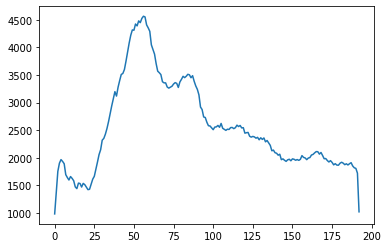

In [53]:
plt.plot(df_do_org.frame.value_counts().sort_index())

In [54]:
df_do_org.frame.value_counts().sort_index()

0       983
1      1373
2      1754
3      1902
4      1967
       ... 
188    1852
189    1819
190    1808
191    1721
192    1021
Name: frame, Length: 193, dtype: int64

In [29]:
df_do[['stab', 'stab_low',  'stab_high']]

,stab,stab_low,stab_high
pid,,,
696771,331.960852,False,True
696772,191.070257,False,False
696773,315.745877,False,True
696774,244.366716,False,True
696775,203.881121,False,False
...,...,...,...
11308808,18.087445,True,False
11308809,15.551263,True,False
11308810,309.604222,False,True


In [32]:
df_sel = df

In [34]:
columns = ['c0_mean', 'c1_mean', 'c2_mean', 'stab', 'cont']
#columns = ['stab']
#percentile = 75
#for col in columns:
#    df_sel['v_' + str(col)] = df_sel[col] > np.percentile(df_sel[col][~df_sel[col].isnull()], percentile)

In [36]:
#time_series_export = {"file-series-version" : "1.0", "files" : []}
path = make_path(f'export/{exp_tag}/kde_volumes')
v_shape, origin = get_canvas_volume(df_sel)

frame_max = df.frame.max()
print('Exported frames:')
for t_point in range(frame_max):
    vs = []
    #vt, origin = get_canvas_volume(df, t_point, t_extra=2)
    for column in columns:
        vcol = 'v_' + str(column)
        v = get_point_volumes2(df_sel, v_shape, origin, t_point, func='gaus', t_extra=2, use_ones = True, column=vcol, micron_per_voxel=1.0, gamma = (5,5,5,5))
        #vs.append(v)
        export_file = f'vol_{column}_{t_point}'
        export_file = os.path.join(path, export_file)
        data = vtk_compat(v)
        export_vol(export_file, data, origin)
        #time_series_export['files'].append(dict(name = export_file, time = float(t_point)))
        print(t_point, column, end='-')

Exported frame: 0 stab
Exported frame: 1 stab
Exported frame: 2 stab
Exported frame: 3 stab
Exported frame: 4 stab
Exported frame: 5 stab
Exported frame: 6 stab
Exported frame: 7 stab
Exported frame: 8 stab
Exported frame: 9 stab
Exported frame: 10 stab
Exported frame: 11 stab
Exported frame: 12 stab
Exported frame: 13 stab
Exported frame: 14 stab
Exported frame: 15 stab
Exported frame: 16 stab
Exported frame: 17 stab
Exported frame: 18 stab
Exported frame: 19 stab
Exported frame: 20 stab
Exported frame: 21 stab
Exported frame: 22 stab
Exported frame: 23 stab
Exported frame: 24 stab
Exported frame: 25 stab
Exported frame: 26 stab
Exported frame: 27 stab
Exported frame: 28 stab
Exported frame: 29 stab
Exported frame: 30 stab
Exported frame: 31 stab
Exported frame: 32 stab
Exported frame: 33 stab
Exported frame: 34 stab
Exported frame: 35 stab
Exported frame: 36 stab
Exported frame: 37 stab
Exported frame: 38 stab
Exported frame: 39 stab
Exported frame: 40 stab
Exported frame: 41 stab
Ex

KeyboardInterrupt: 

# KDE Vector volume

In [41]:
# Select data

col = 'dvx'
df_sel = df[~df[col].isnull()]

frame_max = df_sel.frame.max()
t_extra = 2

In [43]:

#time_series_export = {"file-series-version" : "1.0", "files" : []}
path = make_path(f'export/{exp_tag}/kde_vector_volumes')
columns = ['dvx', 'dvy', 'dvz']
v_shape, origin = get_canvas_volume(df_sel)


print(exp_tag, 'Exported frames:')
for t_point in range(0, frame_max):

    df_do = df_sel.copy()
    f_min = t_point-t_extra
    f_max = t_point+t_extra
    df_do = df_do[df_do.frame>=f_min]
    df_do = df_do[df_do.frame<=f_max]
    
    vs = []
    #vt, origin = get_canvas_volume(df, t_point, t_extra=2)
    for column in columns:
        
        v = get_point_volumes(df_do, v_shape, origin, t_point, func='gaus', t_extra=t_extra, use_ones = False, column=column, micron_per_voxel=1.0, gamma = (5,5,5,5))
        vs.append(v)
    export_file = f'vector_vol_{t_point}'
    export_file = os.path.join(path, export_file)
    data = (vtk_compat(vs[0]),vtk_compat(vs[1]),vtk_compat(vs[2]))
    export_vol(export_file, data, origin)
    #time_series_export['files'].append(dict(name = export_file, time = float(t_point)))
    print(t_point, end='-')

cang Exported frames:
0-1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-98-99-100-101-102-103-104-105-106-107-108-109-110-111-112-113-114-115-116-117-118-119-120-121-122-123-124-125-126-127-128-129-130-131-132-133-134-135-136-137-138-139-140-141-142-143-144-145-146-147-148-149-150-151-152-153-154-155-156-157-158-159-160-161-162-163-164-165-166-167-168-169-170-171-172-173-174-175-176-177-178-179-180-181-182-183-184-185-186-187-188-189-190-191-

### Arrow volume

In [14]:
col = 'dvx'
df_sel = df[~df[col].isnull()]

In [126]:
#path = make_path(f'export/{exp_tag}/arrows')

columns = ['dvx', 'dvy', 'dvz']
v_shape, origin = get_canvas_volume(df)

#for t_point in range(1, 10):
t_point = 20
vs = []
#vt, origin = get_canvas_volume(df, t_point, t_extra=2)
for column in columns:

    v = get_point_volumes2(df_sel, v_shape, origin, t_point, func='gaus', t_extra=2, use_ones = False, column=column, micron_per_voxel=1.0, gamma = (5,5,5,5))
    vs.append(v)

    #export_file = f'arrows_{t_point}'
    #export_file = os.path.join(path, export_file)
#data = (vtk_compat(vs[0]),vtk_compat(vs[1]),vtk_compat(vs[2]))
#export_vol(export_file, data, origin)
#time_series_export['files'].append(dict(name = export_file, time = float(t_point)))
#print('Exported frame:', t_point)

## XY

In [65]:
xy_zoom = 15
z_zoom = 15


zoom = (1/xy_zoom,1/xy_zoom,1/z_zoom)
vz =[]
for v in vs:
    vzoom = ndimage.zoom(v, zoom)
    #vzoom = vzoom**0.5
    vz.append(vzoom)
    

In [66]:
origin

array([-180., -257.,   -9.])

In [67]:
vz[0].shape

(23, 26, 6)

In [68]:
dim = 0
nx = np.linspace(origin[dim],origin[dim]+vz[dim].shape[dim]*xy_zoom, vz[dim].shape[dim])
dim = 1
ny = np.linspace(origin[dim],origin[dim]+vz[dim].shape[dim]*xy_zoom, vz[dim].shape[dim])

In [69]:
ny

array([-257. , -241.4, -225.8, -210.2, -194.6, -179. , -163.4, -147.8,
       -132.2, -116.6, -101. ,  -85.4,  -69.8,  -54.2,  -38.6,  -23. ,
         -7.4,    8.2,   23.8,   39.4,   55. ,   70.6,   86.2,  101.8,
        117.4,  133. ])

In [70]:

xx, yy = np.meshgrid(nx, ny, indexing='ij')
 

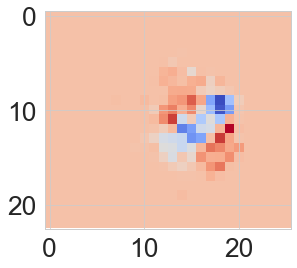

In [71]:
plt.imshow(vz[0][...,3])

(-150.0, 125.0)

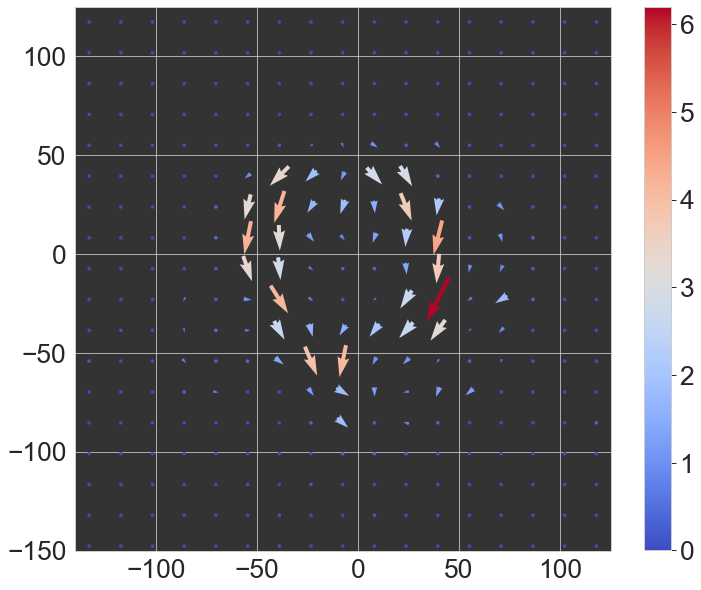

In [77]:
z = 2

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=3)#4.5)
plt.rcParams['image.cmap'] = 'coolwarm'
plt.figure(figsize=(12,10))
plt.quiver(xx, yy,
           vz[0][...,z].ravel(), vz[1][...,z].ravel(),
           ((vz[0][...,z]**2 + vz[1][...,z]**2)**0.5).ravel(),
           #pivot='mid', units='xy',angles='xy', scale=0.06, width=2.5, clim=(0,0.1))
           pivot='mid', units='xy',angles='xy', scale=0.25, width=2., ) #clim=(0,0.2))
plt.gca().set_facecolor((0.2, 0.2, 0.2))
plt.colorbar()

plt.xlim(-140, 125)
plt.ylim(-150, 125)

#plt.savefig('quiv_inj2_xy_20-40', bbox_inches='tight', dpi=600)

## YZ

In [127]:
xy_zoom = 15
z_zoom = 5


zoom = (1/xy_zoom,1/xy_zoom,1/z_zoom)
vz =[]
for v in vs:
    vzoom = ndimage.zoom(v, zoom)
    #vzoom = vzoom**0.5
    vz.append(vzoom)
    

In [128]:
origin

array([-180., -257.,   -9.])

In [129]:
vz[0].shape

(23, 26, 17)

In [130]:
dim = 1
nx = np.linspace(origin[dim],origin[dim]+vz[dim].shape[dim]*xy_zoom, vz[dim].shape[dim])
dim = 2
ny = np.linspace(origin[dim],origin[dim]+vz[dim].shape[dim]*z_zoom, vz[dim].shape[dim])

In [131]:
ny

array([-9.    , -3.6875,  1.625 ,  6.9375, 12.25  , 17.5625, 22.875 ,
       28.1875, 33.5   , 38.8125, 44.125 , 49.4375, 54.75  , 60.0625,
       65.375 , 70.6875, 76.    ])

In [132]:

xx, yy = np.meshgrid(nx, ny, indexing='ij')
 

(-10.0, 80.0)

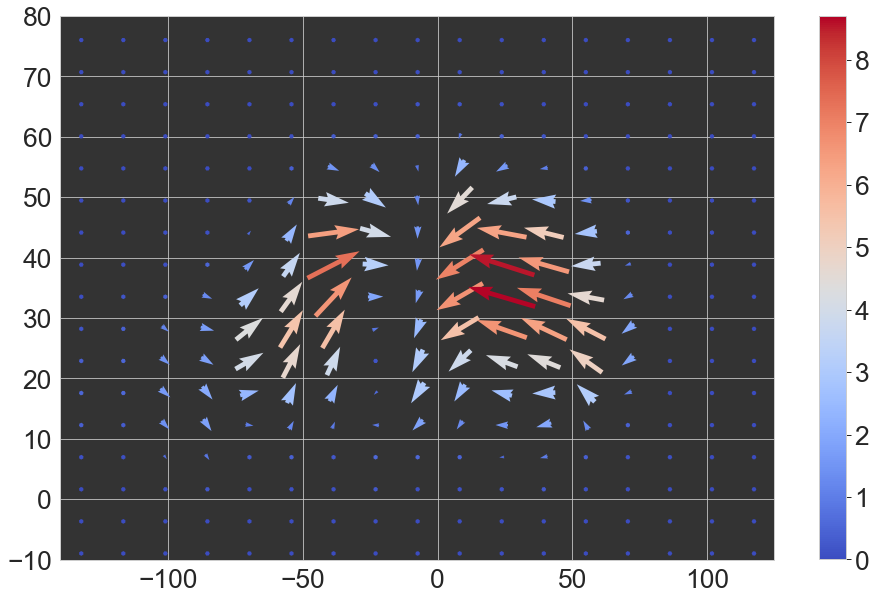

In [134]:
slice_dim = 9
dim1 = 1
dim2 = 2
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=3)#4.5)
plt.rcParams['image.cmap'] = 'coolwarm'
plt.figure(figsize=(16,10))
plt.quiver(xx, yy,
           vz[dim1][slice_dim,...].ravel(), vz[dim2][slice_dim,...].ravel(),
           ((vz[dim1][slice_dim,...]**2 + vz[dim2][slice_dim,...]**2)**0.5).ravel(),
           #pivot='mid', units='xy',angles='xy', scale=0.06, width=2.5, clim=(0,0.1))
           pivot='mid', units='xy',angles='xy', scale=0.4, width=1.5, ) #clim=(0,0.2))
plt.gca().set_facecolor((0.2, 0.2, 0.2))
plt.colorbar()

plt.xlim(-140, 125)
plt.ylim(-10, 80)

#plt.savefig('quiv_inj2_xy_20-40', bbox_inches='tight', dpi=600)

In [116]:
zero_vol = vtk_compat(np.zeros(vz[0].shape))

data = (vtk_compat(vz[0]), vtk_compat(vz[1]), vtk_compat(vz[2]))
export_vol(export_file +'_zoom_xyz', data, origin)
data = (vtk_compat(vz[0]), vtk_compat(vz[1]), zero_vol)
export_vol(export_file +'_zoom_xy', data, origin)
data = (zero_vol, vtk_compat(vz[1]), vtk_compat(vz[2]))
export_vol(export_file +'_zoom_yz', data, origin)